In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\Dell\\Desktop\\project m.sc\\WDIData.csv')

In [3]:
countries = data['Country Name'].unique().tolist()
codes = data['Country Code'].unique().tolist()
indicators = data['Indicator Name'].unique().tolist()
print("Countries: %d" % (len(countries))) #Old method of printing
print("Country Codes: {}".format(len(codes)))
print("Indicators: {}".format(len(indicators)))

Countries: 264
Country Codes: 264
Indicators: 1443


# GDP per capita  for INDIA

In [4]:
first_indicator = 'GDP per capita \(current'
country = 'India'

mask1 = data['Indicator Name'].str.contains(first_indicator) 
mask2 = data['Country Name'].str.contains(country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
c = data[mask1 & mask2]

In [5]:
c = data[mask1 & mask2]
c = c.iloc[1:,]
c = c.transpose()
c = c.iloc[4:,]
df = pd.DataFrame(c)
df.columns = ['India']
df = df.iloc[:-1]


In [6]:
df.head(5)

,India
1960,82.1886
1961,85.3543
1962,89.8818
1963,101.126
1964,115.537


Time series analysis in this one of the variable is time.

In [7]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(df['India'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  4.717725979787687
p value =  1.0
No of lags =  0


It is observed that data is non stationary as p value is greater than 0.05 we
accept null hypothesis that data is not stationary

Applying diffrencing transformations:

In [8]:
df['i']=df['India']-df['India'].shift(1)
df['t']=df['i']-df['i'].shift(1)

In [9]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(df['i'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  0.37039771734852023
p value =  0.980353525228986
No of lags =  9


Still data is non stationary.

In [10]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(df['t'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  -3.790467479601881
p value =  0.0030063648648427335
No of lags =  8


Now, it is seen data become stationary. We can proceed ahead with are ARMA model.

In [11]:
df.head(5)

,India,i,t
1962,89.8818,4.52746,1.36176
1963,101.126,11.2447,6.71722
1964,115.537,14.4111,3.1664
1965,119.319,3.78142,-10.6296
1966,89.9973,-29.3216,-33.103


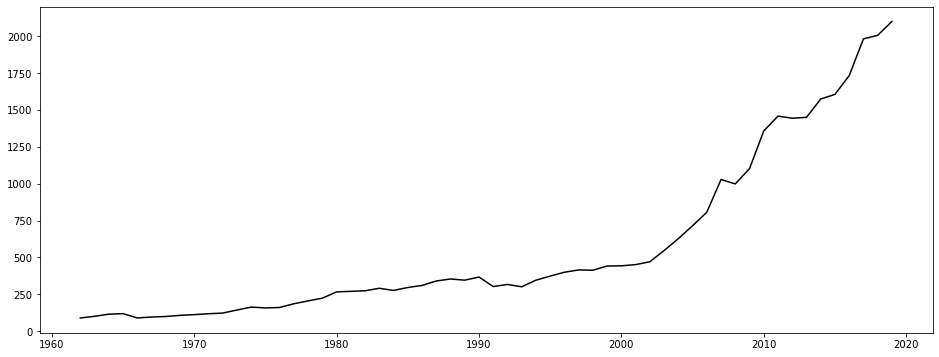

In [12]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y = np.arange(1962,2020)
plt.plot(y,df['India'],color = 'black')

Graph is plotted between year and corresponding income.

In [99]:
from pmdarima import auto_arima
step_wise = auto_arima(df['t'],trace = True,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=633.478, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=663.545, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=654.764, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=632.176, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=661.573, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=634.175, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=634.174, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=632.705, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.987 seconds


Now our df[t] column was stationary and  auto arima function suggests that moing average(1) would be better to predict future

In [100]:
from pmdarima import auto_arima
step_wise = auto_arima(df['i'],trace = True,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=623.722, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=653.165, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=644.571, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=622.330, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=651.192, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=624.330, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=624.330, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=622.872, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.087 seconds


In [13]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(np.asarray(df['i']),order = (0,1,1)).fit()
model.summary()

C:\Users\Dell\Anaconda3\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   57
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -308.166
Method:                       css-mle   S.D. of innovations             53.162
Date:                Fri, 28 May 2021   AIC                            622.332
Time:                        18:27:05   BIC                            628.461
Sample:                             1   HQIC                           624.714
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9130      0.885      2.162      0.031       0.179       3.647
ma.L1.D.y     -0.8947      0.081    -11.098      0.000      -1.053      -0.737
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.1177           +0.0000j            1.1177            0.0000
-----------------------------------------------------------------------------
"""

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(np.asarray(df['t']),order = (0,1,1)).fit()
model1.summary()

C:\Users\Dell\Anaconda3\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   57
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -326.608
Method:                       css-mle   S.D. of innovations             71.910
Date:                Fri, 28 May 2021   AIC                            659.217
Time:                        18:27:10   BIC                            665.346
Sample:                             1   HQIC                           661.599
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.564      0.092      0.927      -1.054       1.157
ma.L1.D.y     -1.0000      0.043    -23.059      0.000      -1.085      -0.915
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
pre = model.predict(start =2,end =len(df))

In [16]:
pred = model1.predict(start =2,end =len(df))

here, we started from 1 because MA(1) uses 1962 for predicting 

In [17]:
pred

array([-2.6001028066198915, 0.6855619345067971, 10.912957207299975,
       26.76082337675949, -34.952956988779476, 3.0650264942518453,
       -3.404062469859487, 3.3758760323782053, -0.771635591939527,
       2.210900528065814, -14.612558277018838, 2.731485390902556,
       24.914666216185157, -8.091167205973232, -20.253371416678423,
       7.066944829104531, 2.5051102386297153, -21.677417098165776,
       39.263818815659235, 0.84391049669048, -12.25631477787411,
       31.546822325298187, -32.998723853499044, 6.843780279560281,
       -14.191270026885753, 17.33435527599097, 22.11910501933714,
       -28.0735395665439, 84.4913149812497, -77.22509151792431,
       29.954623927801407, -58.5930895553243, 18.906589258749435,
       3.069111218847622, 11.941110287797809, 18.576978386504063,
       -29.213586400531646, 28.37197567685871, -5.755143738641708,
       -9.671904210972457, -53.4854345503524, -2.358066984679591,
       -2.9674312961071854, -1.6435185950509634, -123.72489746056073,


In [18]:
pre

array([-0.4743442877453523, -0.4894098816478216, 9.410276666676687,
       35.308492095006024, 1.623669682851964, 5.611892387186313,
       3.104293100901171, 7.105635446958544, 6.901511899797388,
       9.506098863454572, -4.156789562997568, -0.7842973387433929,
       23.453736628752786, 15.17160958352364, -4.2101755700123125,
       3.186222236533551, 5.794606360126728, -14.555804766126741,
       23.437713509928646, 23.059073374912444, 10.462170865847646,
       39.57738323720256, 6.595781838646706, 12.93638575308498,
       -0.7545965870266809, 15.740501592116225, 35.45722073769291,
       7.258812759381243, 85.27887396247448, 8.066783831069145,
       35.691265766813835, -20.49427993819808, -0.9621873505625058,
       2.376182105105485, 13.557903294535084, 29.913090953489398,
       1.0347670070955175, 27.339431124338848, 20.161366994076182,
       9.971070742403455, -39.56137826688202, -38.23219780758542,
       -37.69742856322852, -36.115311393634784, -146.4362781183957,
      

In [19]:
j=0
k = 89.8818
a = []
a.append(k)
for i in range(1963,2020,1):
    k= k +pre[j]
    a.append(k)


In [20]:
j=0
k = 4.52746
a1 = []
a1.append(k)
for i in range(1963,2020,1):
    k= k +pred[j]
    a1.append(k)


In [21]:
j=0
k = 89.8818
a2 = []
a2.append(k)
for i in range(1963,2020,1):
    k= k +a1[j]
    a2.append(k)

forecasting the predicted to original value

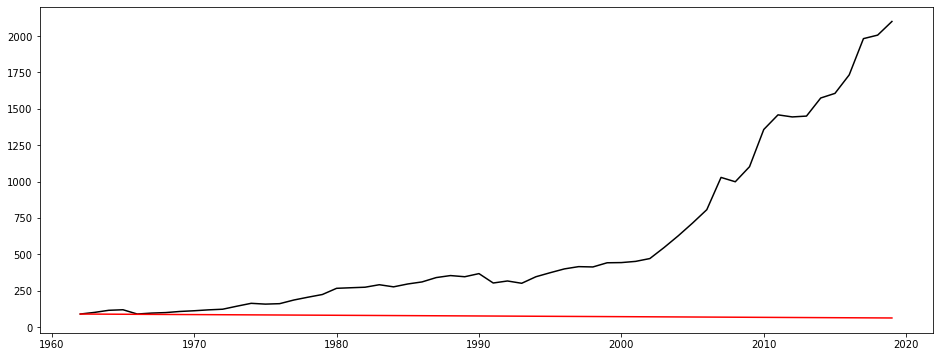

In [22]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y = np.arange(1962,2020)
plt.plot(y,df['India'],color = 'black')
plt.plot(y,a,color = 'red')

In [23]:
train = df[:len(df)-14]
test = df[len(df)-14:]

Greater change is observed after 2005. So, we divide the data into two parts namely test and training and perform seperate analysis on test set

In [24]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
train.dropna(inplace = True)
t = adfuller(train['i'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  -2.0326657065032188
p value =  0.2724364829325251
No of lags =  3


<ipython-input-24-da42ee90d660>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace = True)


Data non stationary.

In [25]:
## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(test['i'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  -15.503597417524945
p value =  2.3981431998725574e-28
No of lags =  5


Now it seen that  after applying first degree diffrecing on test set data becomes stable so we proceed our analysis with df[i] column

In [26]:
from pmdarima import auto_arima
step_wise = auto_arima(test['i'],trace = True,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=169.530, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=171.167, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=178.725, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.025 seconds


### Now we observe that after splitting data in train and test set and performing first degree transformation on test set data becomes stable. But  Autoarima function doesn't predict appropriate model for predicting df[i] column.

In [27]:
## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(test['India'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  0.4500474231482604
p value =  0.98327308641642
No of lags =  4


In [28]:
from pmdarima import auto_arima
step_wise = auto_arima(test['India'],trace = True,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=158.663, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=160.343, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=166.616, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.717 seconds


In [29]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(np.asarray(test['India']),order = (0,1,0)).fit()
model.summary()

C:\Users\Dell\Anaconda3\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   13
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -77.332
Method:                           css   S.D. of innovations             92.726
Date:                Fri, 28 May 2021   AIC                            158.663
Time:                        18:29:51   BIC                            159.793
Sample:                             1   HQIC                           158.431
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.4497     25.718      3.867      0.000      49.044     149.855
==============================================================================
"""

In [30]:
pre = model.predict(start =1,end =len(test))

In [31]:
j=0
k = 806.753
a = []
for i in range(2007,2020,1):
    k= k +pre[j]
    a.append(k)

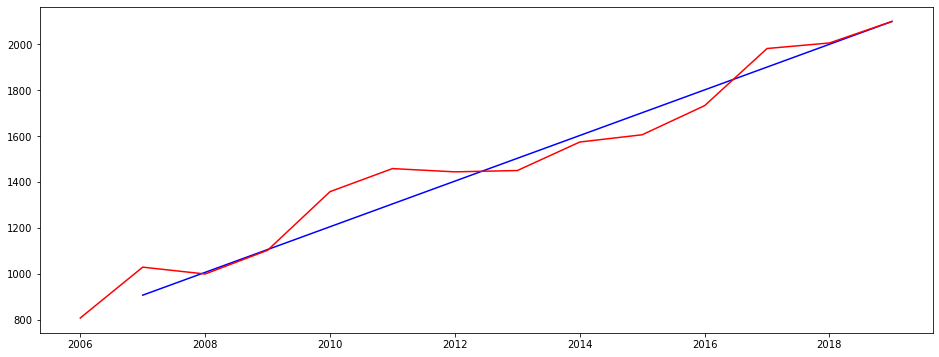

In [32]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y1 = np.arange(2007,2020) 
y = np.arange(2006,2020)
plt.plot(y1,a,color = 'blue',label ='Predicted')
plt.plot(y,test['India'],color = 'red',label ='Actual')

In [33]:
test

,India,i,t
2006,806.753,91.8923,4.8055
2007,1028.33,221.581,129.689
2008,998.522,-29.8124,-251.394
2009,1101.96,103.439,133.251
2010,1357.56,255.603,152.164
2011,1458.1,100.54,-155.063
2012,1443.88,-14.224,-114.764
2013,1449.61,5.72638,19.9504
2014,1573.88,124.276,118.549
2015,1605.61,31.7239,-92.5516


In [34]:
test = test.iloc[1:,]

In [35]:
test['India'].mean()
test['predicted']=a

<ipython-input-35-803fb571341e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted']=a


In [36]:
test

,India,i,t,predicted
2007,1028.33,221.581,129.689,906.202674
2008,998.522,-29.8124,-251.394,1005.652349
2009,1101.96,103.439,133.251,1105.102023
2010,1357.56,255.603,152.164,1204.551698
2011,1458.1,100.54,-155.063,1304.001372
2012,1443.88,-14.224,-114.764,1403.451046
2013,1449.61,5.72638,19.9504,1502.900721
2014,1573.88,124.276,118.549,1602.350395
2015,1605.61,31.7239,-92.5516,1701.800070
2016,1732.56,126.959,95.2349,1801.249744


In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model


print("R squared: {}".format(r2_score(y_true=test['India'],y_pred= test['predicted'])))


R squared: 0.9439434387776041


In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(a,test['India']))
print (rmse)

82.26565880908595


# Forecasting

In [62]:
b = 2099.5987674000003
f = []
f.append(b)
for i in range(2020,2025):
    b = b+pre[0]
    f.append(b)
f

[2099.5987674000003,
 2199.048441815385,
 2298.49811623077,
 2397.9477906461548,
 2497.3974650615396,
 2596.8471394769244]

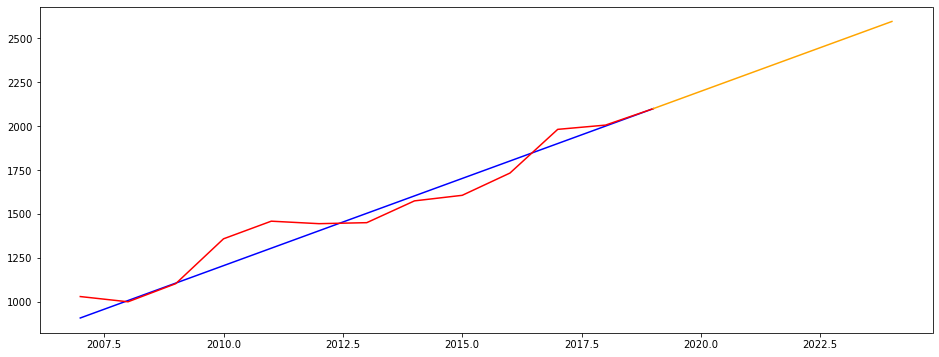

In [63]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y1 = np.arange(2007,2020) 
y = np.arange(2006,2020)
y2 = np.arange(2019,2025)
plt.plot(y1,a,color = 'blue',label ='Predicted')
plt.plot(y1,test['India'],color = 'red',label ='Actual')
plt.plot(y2,f,color = 'orange',label = 'forecasted')

# GDP per capita for China

In [38]:
first_indicator = 'GDP per capita \(current'
country = 'CHN'

mask1 = data['Indicator Name'].str.contains(first_indicator) 
mask2 = data['Country Code'].str.contains(country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
c = data[mask1 & mask2]

In [39]:
c = data[mask1 & mask2]
c = c.iloc[1:,]
c = c.transpose()
c = c.iloc[4:,]
df = pd.DataFrame(c)
df.columns = ['China']
df = df.iloc[:-1]


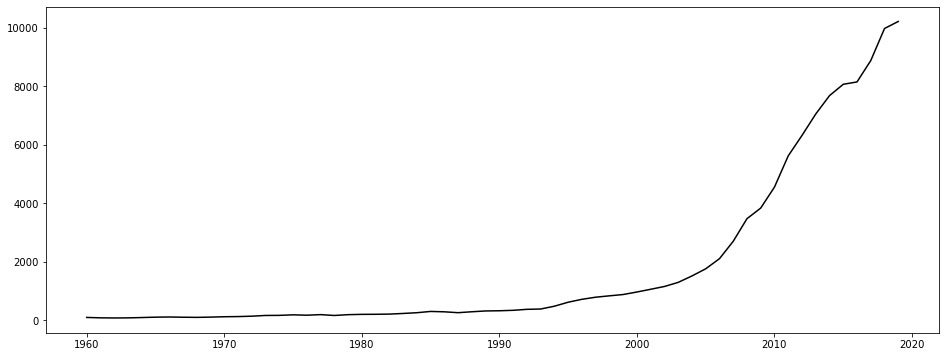

In [40]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y1 = np.arange(1960,2020)
plt.plot(y1,df['China'],color = 'black')

In [41]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(df['China'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  6.15294302386962
p value =  1.0
No of lags =  9


In [42]:
train = df[:len(df)-19]
test = df[len(df)-19:]

In [43]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(test['China'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  1.3188436740694374
p value =  0.9967123867333796
No of lags =  0


In [44]:
from pmdarima import auto_arima
step_wise = auto_arima(test['China'],trace = True,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=261.371, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=261.508, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=283.072, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.639 seconds


In [45]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(np.asarray(test['China']),order = (0,1,0)).fit()
model.summary()

C:\Users\Dell\Anaconda3\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   18
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -128.686
Method:                           css   S.D. of innovations            308.051
Date:                Fri, 28 May 2021   AIC                            261.371
Time:                        18:33:29   BIC                            263.152
Sample:                             1   HQIC                           261.617
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.0846     72.608      7.011      0.000     366.775     651.394
==============================================================================
"""

In [46]:
pre = model.predict(start =2,end =len(df))


In [47]:
j=0
k = 959.372
a = []
for i in range(2001,2020,1):
    k= k +pre[j]
    a.append(k)


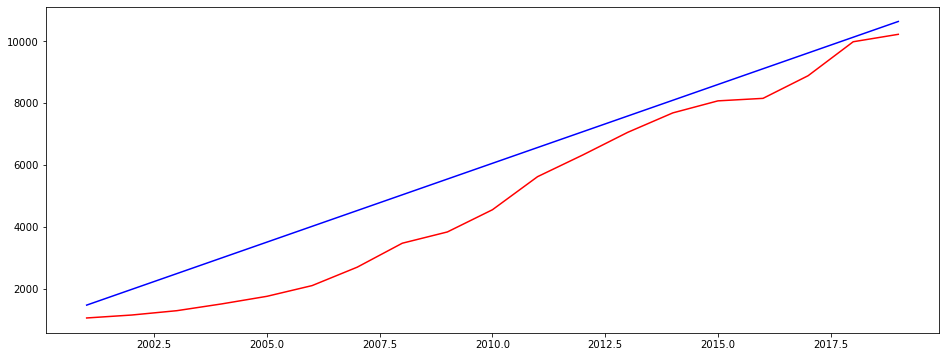

In [48]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y1 = np.arange(2001,2020) 
plt.plot(y1,a,color = 'blue',label ='Predicted')
plt.plot(y1,test['China'],color = 'red',label ='Actual')

In [49]:
test['China'].mean()
test['predicted']= a

<ipython-input-49-84f3ff7b7420>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted']= a


In [50]:
test

,China,predicted
2001,1053.11,1468.456560
2002,1148.51,1977.541121
2003,1288.64,2486.625681
2004,1508.67,2995.710242
2005,1753.42,3504.794802
2006,2099.23,4013.879362
2007,2693.97,4522.963923
2008,3468.3,5032.048483
2009,3832.24,5541.133043
2010,4550.45,6050.217604


In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model


print("R squared: {}".format(r2_score(y_true=test['China'],y_pred= test['predicted'])))

R squared: 0.8588786128794156


In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(a,test['China']))
print (rmse)

1170.2955560995838


# Forecasting 

In [40]:
b =  10631.978647388882
f = []
f.append(b)
for i in range(2021,2031):
    b = b+pre[0]
    f.append(b)

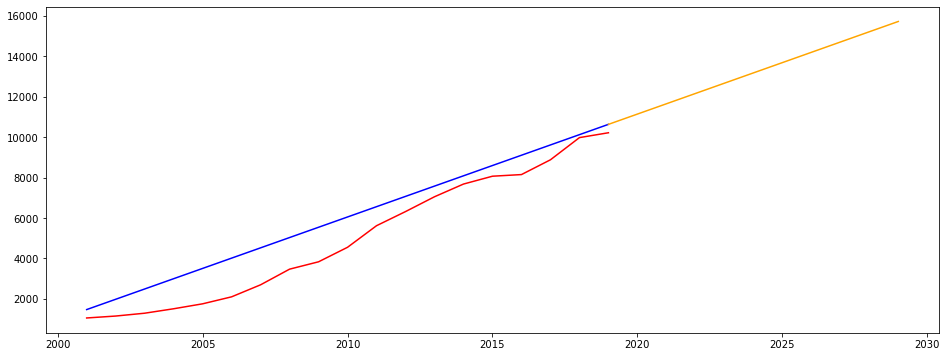

In [41]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y1 = np.arange(2001,2020) 
y2 = np.arange(2019,2030)
plt.plot(y1,a,color = 'blue',label ='Predicted')
plt.plot(y1,test['China'],color = 'red',label ='Actual')
plt.plot(y2,f,color = 'orange',label = 'forecasted')

# GDP per capita for USA

In [79]:
first_indicator = 'GDP per capita \(current'
country = 'USA'

mask1 = data['Indicator Name'].str.contains(first_indicator) 
mask2 = data['Country Code'].str.contains(country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
c = data[mask1 & mask2]

In [80]:
c = data[mask1 & mask2]
c = c.iloc[1:,]
c = c.transpose()
c = c.iloc[4:,]
df = pd.DataFrame(c)
df.columns = ['USA']
df = df.iloc[:-1]


In [81]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(df['USA'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  3.1560430496337064
p value =  1.0
No of lags =  2


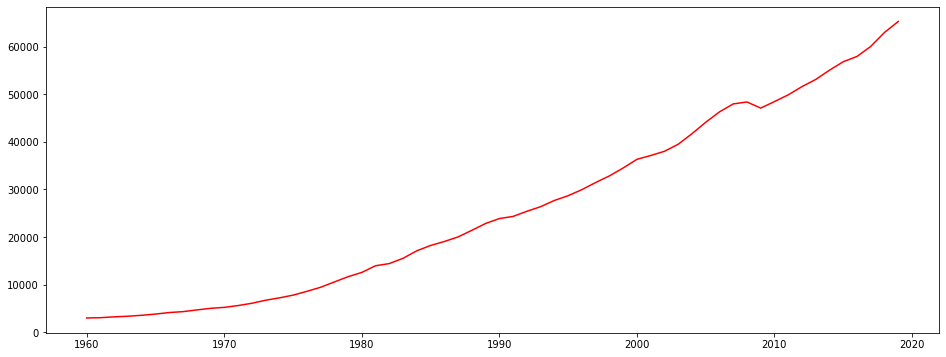

In [82]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y1 = np.arange(1960,2020) 
plt.plot(y1,df['USA'],color = 'red',label ='Actual')


In [83]:
df['i']=df['USA']-df['USA'].shift(1)

In [84]:

## CHECKING FOR STATONARY
from statsmodels.tsa.stattools import adfuller
df.dropna(inplace = True)
t = adfuller(test['i'],autolag ='AIC')
print('ADF = ',t[0])
print('p value = ',t[1])
print('No of lags = ',t[2])

ADF =  -2.391149287100741
p value =  0.14425005534520147
No of lags =  0


In [85]:
from pmdarima import auto_arima
step_wise = auto_arima(df['i'],trace = True,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=909.630, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=910.355, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=907.875, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.134 seconds


In [86]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(np.asarray(df['i']),order = (0,1,0)).fit()
model.summary()

C:\Users\Dell\Anaconda3\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   58
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -452.815
Method:                           css   S.D. of innovations            594.796
Date:                Fri, 28 May 2021   AIC                            909.630
Time:                        18:42:29   BIC                            913.751
Sample:                             1   HQIC                           911.235
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6484     78.101      0.495      0.621    -114.426     191.723
==============================================================================
"""

In [87]:
pre = model.predict(start =2,end =len(df))


In [88]:

j=0
k =  177.28
a = []
a.append(k)
for i in range(1963,2020,1):
    k= k +pre[j]
    a.append(k)
a

[177.28,
 215.92839303448295,
 254.5767860689659,
 293.22517910344885,
 331.8735721379318,
 370.52196517241475,
 409.17035820689773,
 447.8187512413807,
 486.4671442758637,
 525.1155373103467,
 563.7639303448296,
 602.4123233793126,
 641.0607164137956,
 679.7091094482786,
 718.3575024827616,
 757.0058955172445,
 795.6542885517275,
 834.3026815862105,
 872.9510746206935,
 911.5994676551765,
 950.2478606896594,
 988.8962537241424,
 1027.5446467586253,
 1066.1930397931083,
 1104.8414328275912,
 1143.4898258620742,
 1182.1382188965572,
 1220.7866119310402,
 1259.4350049655231,
 1298.0833980000061,
 1336.731791034489,
 1375.380184068972,
 1414.028577103455,
 1452.676970137938,
 1491.325363172421,
 1529.973756206904,
 1568.622149241387,
 1607.27054227587,
 1645.918935310353,
 1684.567328344836,
 1723.215721379319,
 1761.8641144138019,
 1800.5125074482849,
 1839.1609004827678,
 1877.8092935172508,
 1916.4576865517338,
 1955.1060795862168,
 1993.7544726206997,
 2032.4028656551827,
 2071.051258

In [89]:
b =[]
t = 3243.84
b.append(t)
k =1
for i in range(1963,2020):
    t = t+ a[k]
    b.append(t)
    k = k+1
b

[3243.84,
 3459.768393034483,
 3714.3451791034486,
 4007.5703582068973,
 4339.443930344829,
 4709.965895517244,
 5119.136253724141,
 5566.955004965522,
 6053.422149241385,
 6578.537686551732,
 7142.301616896561,
 7744.713940275874,
 8385.77465668967,
 9065.483766137948,
 9783.84126862071,
 10540.847164137955,
 11336.501452689683,
 12170.804134275893,
 13043.755208896588,
 13955.354676551764,
 14905.602537241424,
 15894.498790965567,
 16922.04343772419,
 17988.236477517297,
 19093.077910344888,
 20236.567736206962,
 21418.70595510352,
 22639.492567034562,
 23898.927572000084,
 25197.01097000009,
 26533.74276103458,
 27909.122945103554,
 29323.15152220701,
 30775.828492344946,
 32267.15385551737,
 33797.127611724274,
 35365.749760965664,
 36973.02030324153,
 38618.93923855188,
 40303.506566896715,
 42026.72228827603,
 43788.586402689834,
 45589.09891013812,
 47428.25981062089,
 49306.06910413814,
 51222.52679068988,
 53177.632870276095,
 55171.38734289679,
 57203.790208551975,
 59274.841

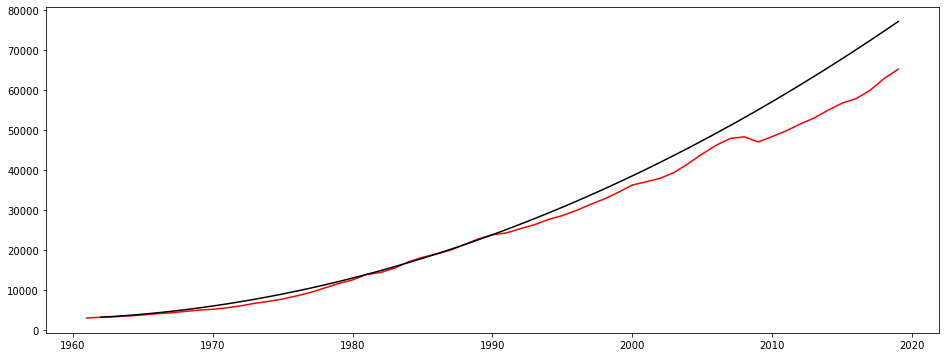

In [90]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y1 = np.arange(1961,2020)
y2 = np.arange(1962,2020)
plt.plot(y1,df['USA'],color = 'red',label ='Actual')
plt.plot(y2,b,color = 'black',label ='Actual')

In [91]:
df = df.iloc[1:]

In [102]:
train = df[:len(df)-19]
test = df[len(df)-19:]

In [103]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(train['predicted'],train['USA']))
print (rmse)

1145.8855283394294


In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['predicted'],test['USA']))
print (rmse)

8497.545090590998


In [98]:
test

,USA,i
2001,37133.2,798.334
2002,38023.2,889.918
2003,39496.5,1473.32
2004,41712.8,2216.32
2005,44114.7,2401.95
2006,46298.7,2183.98
2007,47976,1677.24
2008,48382.6,406.591
2009,47100,-1282.58
2010,48467.5,1367.54


In [94]:
df['predicted']= b
df['USA'].mean()

26888.98024158621

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(b,df['USA']))
print (rmse)

4953.518900539585


In [101]:
df['diff'] = df['predicted']- df['USA']
df

,USA,i,predicted,diff
1962,3243.84,177.28,3243.840000,-0.003078
1963,3374.52,130.672,3459.768393,85.2532
1964,3573.94,199.426,3714.345179,140.404
1965,3827.53,253.586,4007.570358,180.043
1966,4146.32,318.79,4339.443930,193.127
1967,4336.43,190.11,4709.965896,373.539
1968,4695.92,359.497,5119.136254,423.213
1969,5032.14,336.221,5566.955005,534.81
1970,5234.3,202.152,6053.422149,819.125
1971,5609.38,375.086,6578.537687,969.155


# FORECASTING

In [88]:
j=0
k =    2380.2384029655295
f = []
f.append(k)
for i in range(2019,2031,1):
    k= k +pre[j]
    f.append(k)
f

[2380.2384029655295,
 2418.8867960000125,
 2457.5351890344955,
 2496.1835820689785,
 2534.8319751034614,
 2573.4803681379444,
 2612.1287611724274,
 2650.7771542069104,
 2689.4255472413934,
 2728.0739402758763,
 2766.7223333103593,
 2805.3707263448423,
 2844.0191193793253]

In [93]:
fo =[]
t =   77234.59368600039
fo.append(t)
k =1
for i in range(2019,2031):
    t = t+ f[k]
    fo.append(t)
    k = k+1


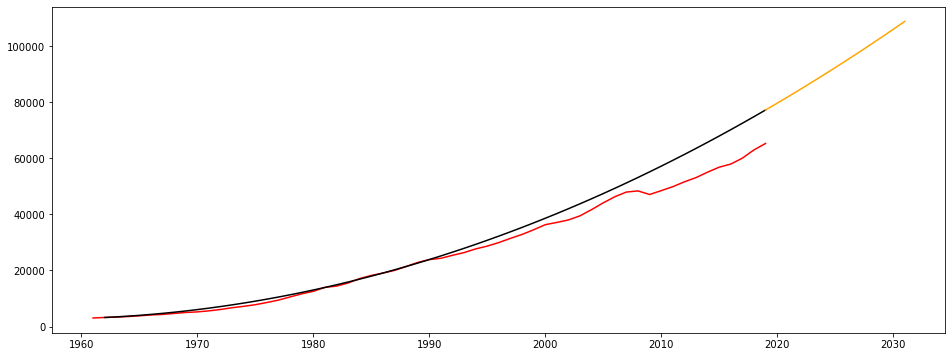

In [94]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y1 = np.arange(1961,2020)
y3 = np.arange(1962,2020)
y2 = np.arange(2019,2032)
plt.plot(y1,df['USA'],color = 'red',label ='Actual')
plt.plot(y3,b,color = 'black',label ='Actual')
plt.plot(y2,fo,color = 'orange',label ='Actual')

In [84]:
len(df['USA'])

59

In [106]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model


print("R squared: {}".format(r2_score(y_true=test['USA'],y_pred= test['predicted'])))

R squared: -0.137763510138057


# ?

In [107]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model


print("R squared: {}".format(r2_score(y_true=df['USA'],y_pred= df['predicted'])))

R squared: 0.9304827381395645
